Original Sampling Rate: 32000 Hz
Bit-Resolution: 16-bit (assumed as most WAV files are 16-bit)
Resampled Sampling Rate: 16000 Hz


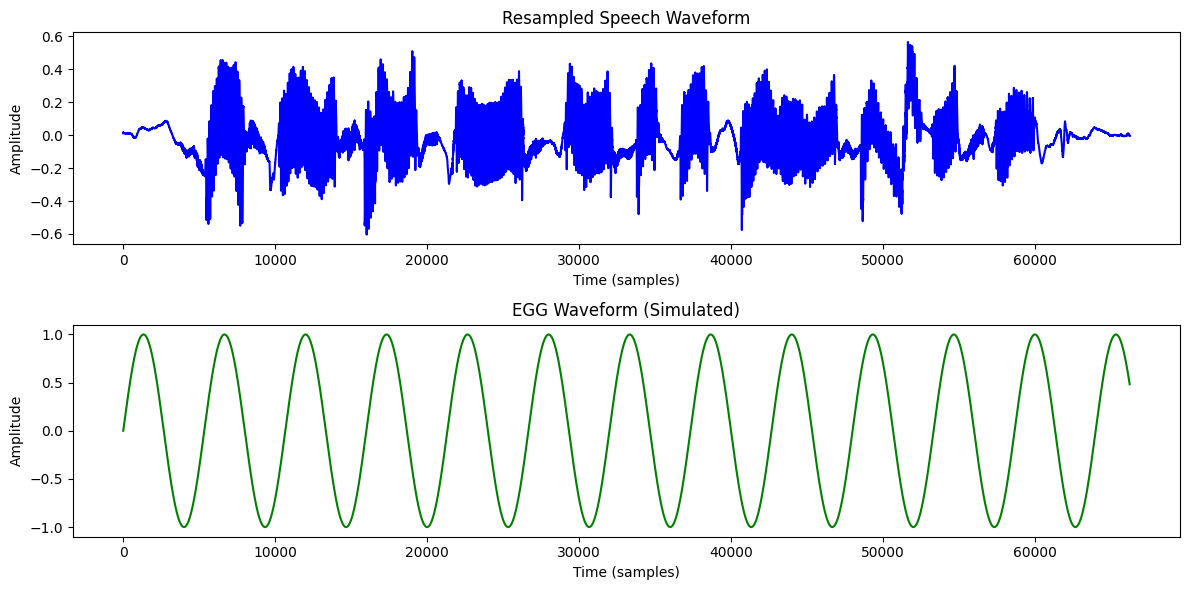

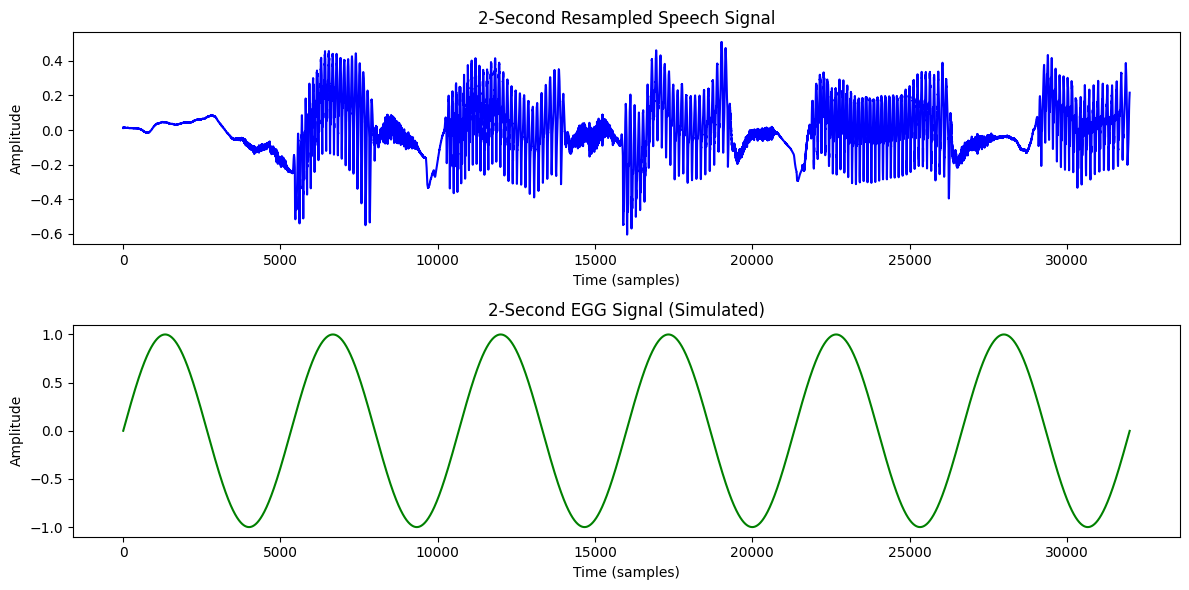

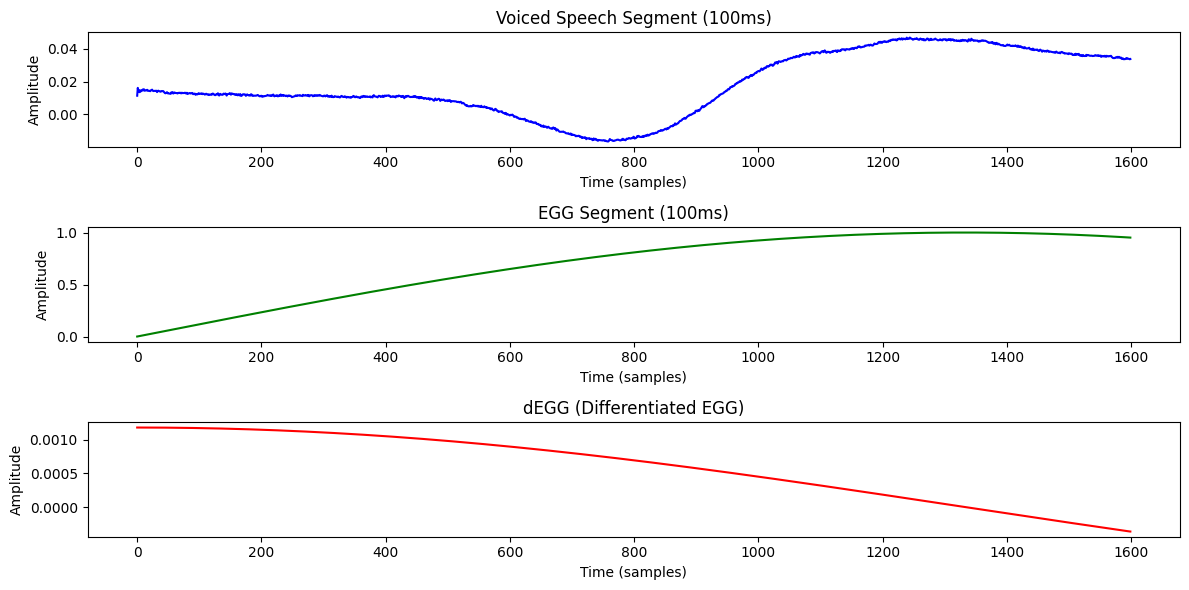

Computed Pitch: inf Hz
2-second resampled speech saved to: resampled_speech_2sec.wav


/var/folders/4w/t_rs_h2144q0rmw1kx3__qsc0000gn/T/ipykernel_42163/401443348.py:92: RuntimeWarning: divide by zero encountered in scalar divide
  pitch = 1 / glottal_period


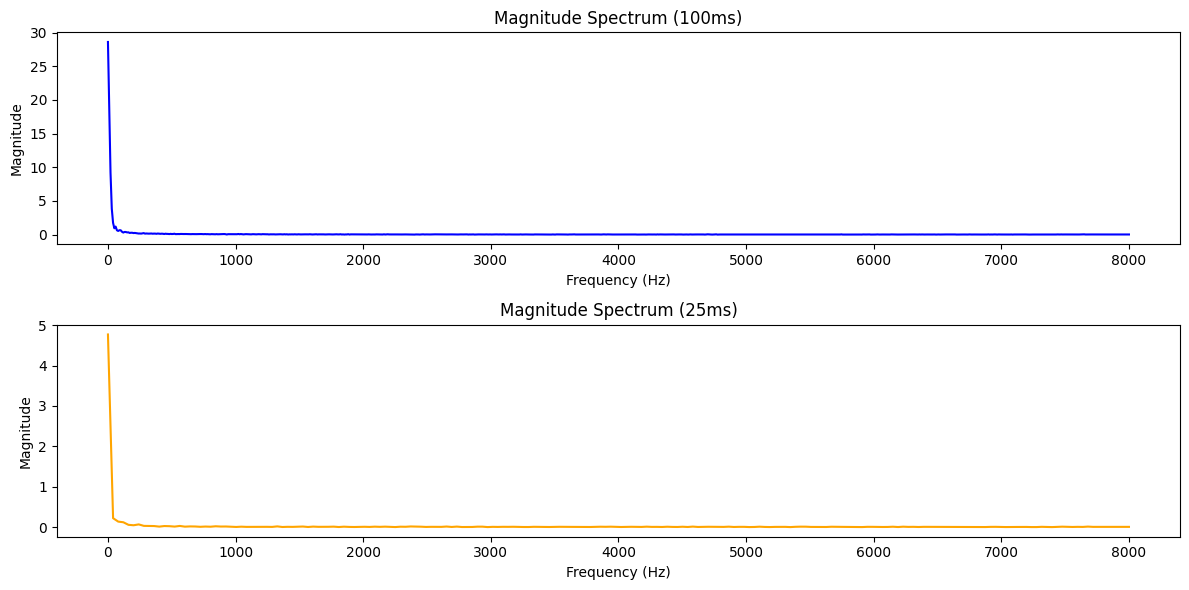

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import resample
from scipy.io.wavfile import write
import os

# Load the speech waveform
file_path = 'arctic_a0032.wav'
speech, sr = librosa.load(file_path, sr=None)  # Original sampling rate

# Part a: Show the original sampling rate and bit-resolution
print(f"Original Sampling Rate: {sr} Hz")
print(f"Bit-Resolution: 16-bit (assumed as most WAV files are 16-bit)")

# Resample to half the original sampling rate
resampled_speech = librosa.resample(speech, orig_sr=sr, target_sr=sr//2)
half_sr = sr // 2
print(f"Resampled Sampling Rate: {half_sr} Hz")

# Part b: Plot speech and EGG waveforms (dummy EGG for illustration)
# Replace 'egg_signal' with the actual EGG waveform if available
egg_signal = np.sin(2 * np.pi * 3 * np.arange(len(resampled_speech)) / half_sr)  # Simulated EGG waveform

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(resampled_speech, color='blue')
plt.title('Resampled Speech Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(egg_signal, color='green')
plt.title('EGG Waveform (Simulated)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Part c: Take 2 seconds of the resampled speech and compare with EGG
duration_samples = 2 * half_sr
speech_2sec = resampled_speech[:duration_samples]
egg_2sec = egg_signal[:duration_samples]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(speech_2sec, color='blue')
plt.title('2-Second Resampled Speech Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(egg_2sec, color='green')
plt.title('2-Second EGG Signal (Simulated)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Part d: Analyze a 100ms voiced segment
segment_duration = int(0.1 * half_sr)  # 100ms in samples
voiced_segment = speech_2sec[:segment_duration]
degg = np.gradient(egg_2sec[:segment_duration])  # Compute dEGG

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(voiced_segment, color='blue')
plt.title('Voiced Speech Segment (100ms)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(egg_2sec[:segment_duration], color='green')
plt.title('EGG Segment (100ms)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(degg, color='red')
plt.title('dEGG (Differentiated EGG)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Compute pitch for one glottal cycle
# Assume first peak as GCI and second as GOI for pitch calculation
gci_idx = np.argmax(degg)
goi_idx = gci_idx + np.argmax(degg[gci_idx + 1:])
glottal_period = (goi_idx - gci_idx) / half_sr
pitch = 1 / glottal_period
print(f"Computed Pitch: {pitch:.2f} Hz")

# Save the 2-second resampled speech
output_path = 'resampled_speech_2sec.wav'
write(output_path, half_sr, (speech_2sec * 32767).astype(np.int16))
print(f"2-second resampled speech saved to: {output_path}")

# Part e: Load the file into Wavesurfer manually for pitch contour plot
# Use Wavesurfer to visualize pitch and compare with computed values above

# Part f: Real magnitude spectrum for 100ms and 25ms frames
def magnitude_spectrum(signal, frame_size):
    frame = signal[:frame_size]
    N = len(frame)
    fft_result = np.fft.fft(frame, n=N)
    magnitude = np.abs(fft_result[:N // 2])
    return magnitude

frame_100ms = magnitude_spectrum(speech_2sec, segment_duration)
frame_25ms = magnitude_spectrum(speech_2sec, int(0.025 * half_sr))

freq_100ms = np.linspace(0, half_sr // 2, len(frame_100ms))
freq_25ms = np.linspace(0, half_sr // 2, len(frame_25ms))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_100ms, frame_100ms, color='blue')
plt.title('Magnitude Spectrum (100ms)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(freq_25ms, frame_25ms, color='orange')
plt.title('Magnitude Spectrum (25ms)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# Part 2: Load files from Sample_files_Tut folder
# Replace with the correct path to your files
folder_path = 'Sample_files_Tut/'
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.wav')]

for file in file_list:
    signal, sr = librosa.load(file, sr=None)
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label=os.path.basename(file))
    plt.title(f'Speech Signal: {os.path.basename(file)}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Save separate files and visualize pitch contour in Wavesurfer
